<a href="https://colab.research.google.com/github/mouli4401/PlantDiseaseDetection/blob/main/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Resuming download from 2769289216 bytes (128419971 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/vipoooool/new-plant-diseases-dataset?dataset_version_number=2 (2769289216/2897709187) bytes left.


100%|██████████| 2.70G/2.70G [00:00<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [3]:
#importing lib
import numpy as np # numeric which handle algebra
import pandas as pd #data manipulation we use
import matplotlib.pyplot as plt # visualization purposes
import tensorflow as tf
import os
import glob as gb
import cv2


In [4]:
print(path)

/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [5]:
train="/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/"


Found 175767 images belonging to 3 classes.


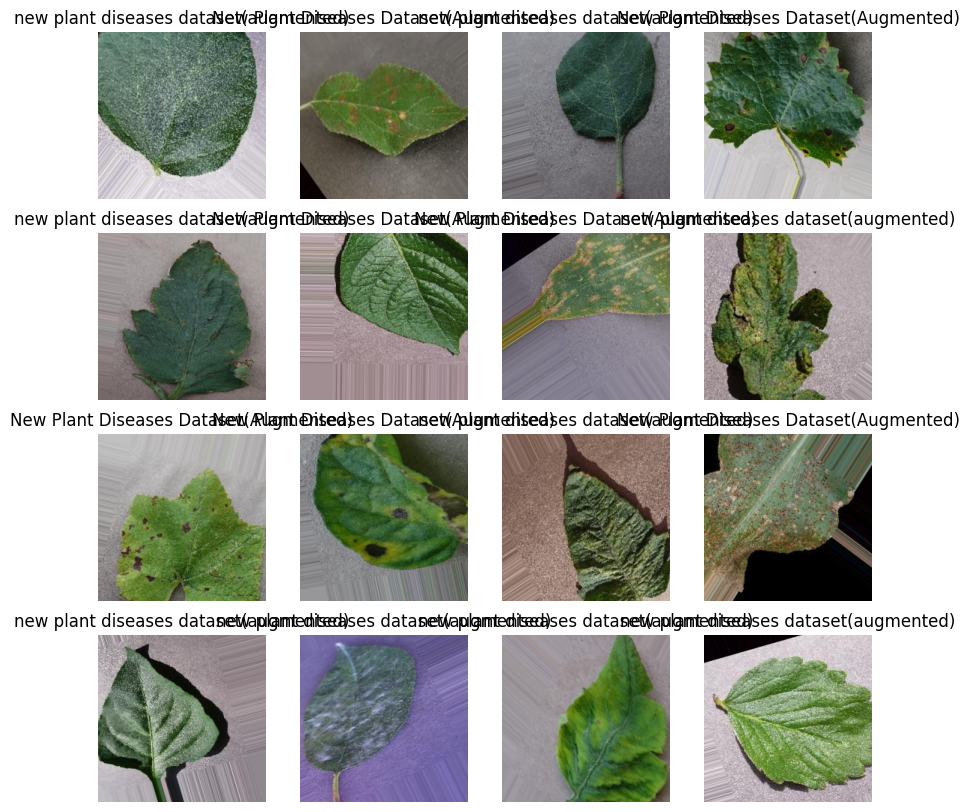

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

classes = list(train_generator.class_indices.keys())

plt.figure(figsize=(10,10))

X_batch, y_batch = next(train_generator)

for i in range(min(16, len(X_batch))):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_batch[i])
    plt.title(classes[np.argmax(y_batch[i])])
    plt.axis('off')

plt.show()


In [8]:
valid="/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

In [9]:


valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
).flow_from_directory(
    valid,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 35152 images belonging to 3 classes.


In [10]:
test="/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

In [11]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
).flow_from_directory(
    test,
    batch_size=164,
    target_size=(224, 224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
)


Found 175767 images belonging to 3 classes.


In [15]:
print(list(test_generator.class_indices.keys()))


['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
